#**Loan Application Modeling**

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('Bank_CreditScoring.csv')

In [ ]:
# Display general information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Credit_Card_Exceed_Months          2350 non-null   int64 
 1   Employment_Type                    2350 non-null   object
 2   Loan_Amount                        2350 non-null   int64 
 3   Loan_Tenure_Year                   2350 non-null   int64 
 4   More_Than_One_Products             2350 non-null   object
 5   Credit_Card_More_Than_Months       2350 non-null   int64 
 6   Number_of_Dependents               2350 non-null   int64 
 7   Years_to_Financial_Freedom         2350 non-null   int64 
 8   Number_of_Credit_Card_Facility     2350 non-null   int64 
 9   Number_of_Properties               2350 non-null   int64 
 10  Number_of_Bank_Products            2350 non-null   int64 
 11  Number_of_Loan_to_Approve          2350 non-null   int64 
 12  Proper

In [ ]:
# Descriptive statistics for numerical features
print(df.describe())

       Credit_Card_Exceed_Months    Loan_Amount  Loan_Tenure_Year  \
count                2350.000000    2350.000000       2350.000000   
mean                    4.723404  448350.120851         17.053191   
std                     2.101127  202814.886797          4.352123   
min                     1.000000  100194.000000         10.000000   
25%                     3.000000  273169.250000         13.000000   
50%                     5.000000  447251.500000         17.000000   
75%                     7.000000  623714.000000         21.000000   
max                     7.000000  799628.000000         24.000000   

       Credit_Card_More_Than_Months  Number_of_Dependents  \
count                    2350.00000            2350.00000   
mean                        2.12766               3.12766   
std                         1.40874               1.40874   
min                         1.00000               2.00000   
25%                         1.00000               2.00000   
50%         

In [ ]:
# Descriptive statistics for categorical features
print(df.describe(include=['object']))

       Employment_Type More_Than_One_Products Property_Type         State  \
count             2350                   2350          2350          2350   
unique               5                      2             4            15   
top      Self_Employed                    yes   condominium  Kuala Lumpur   
freq               600                   1175           880           850   

       Decision  
count      2350  
unique        2  
top      Accept  
freq       1769  


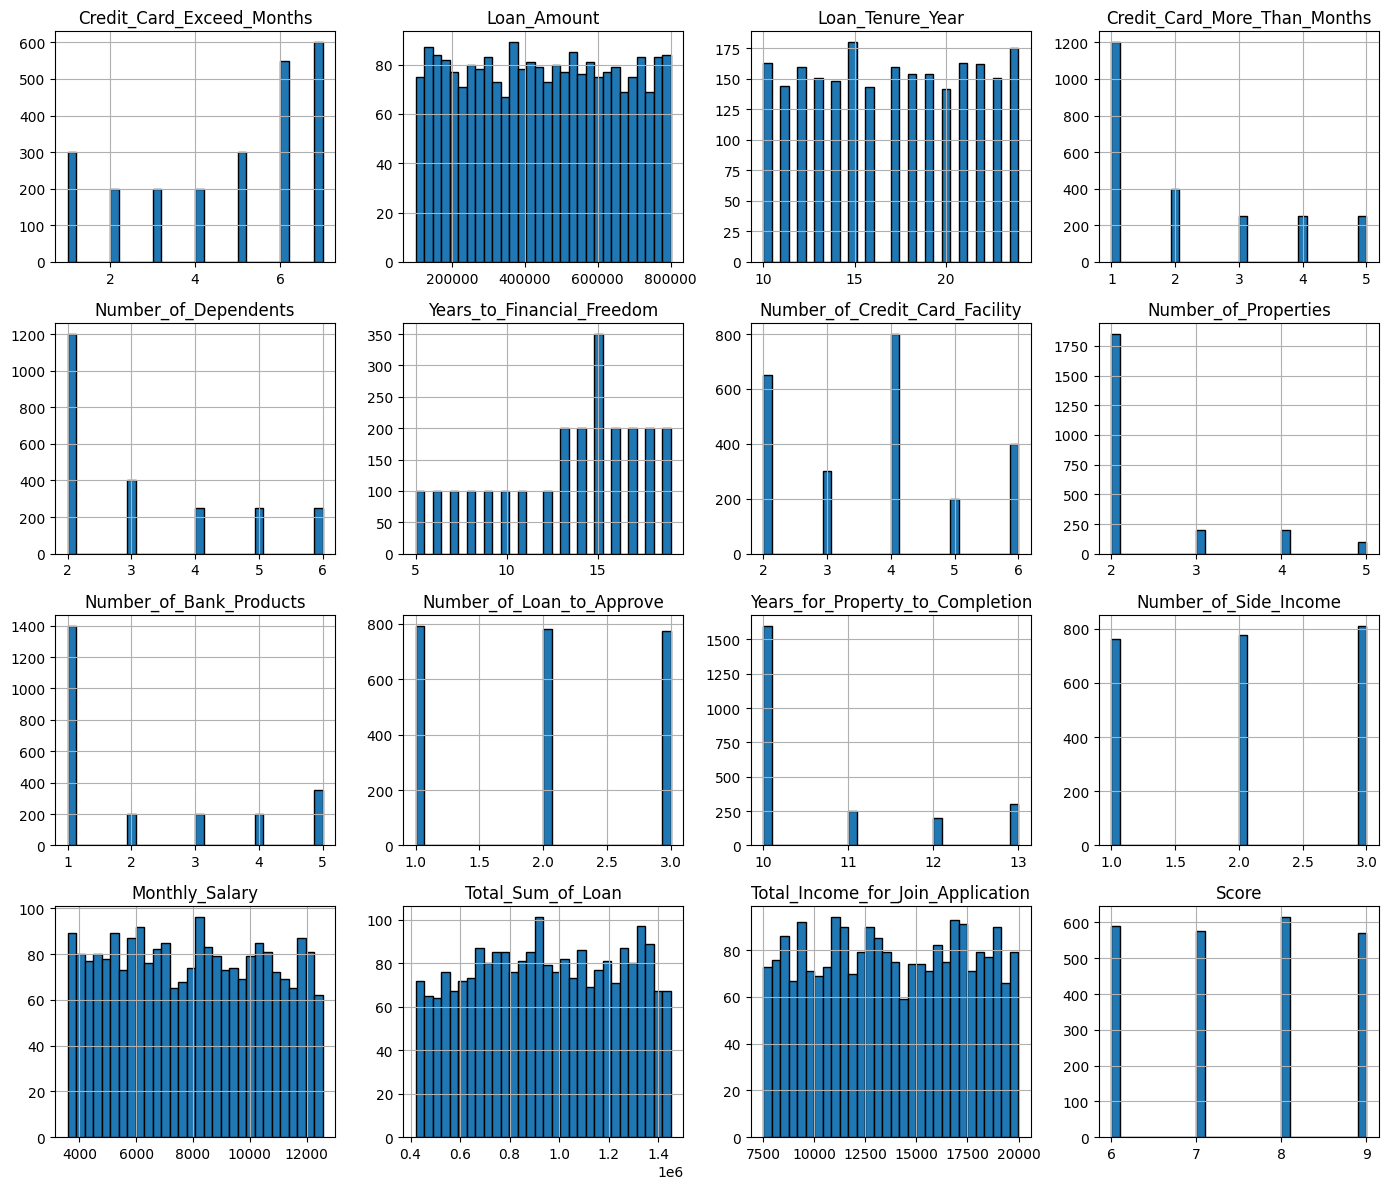

In [ ]:
# Plot distribution of numerical features
df.hist(figsize=(14, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

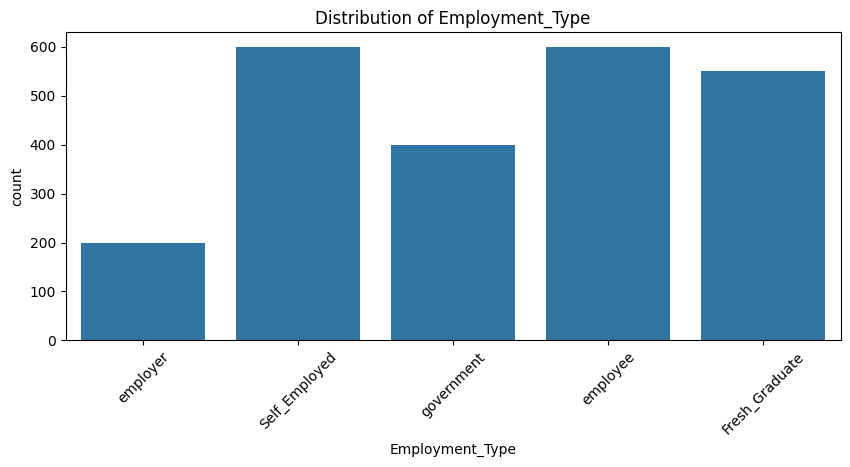

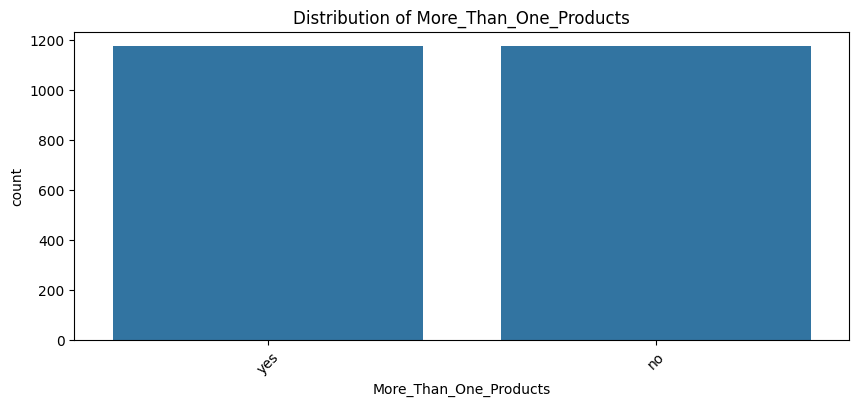

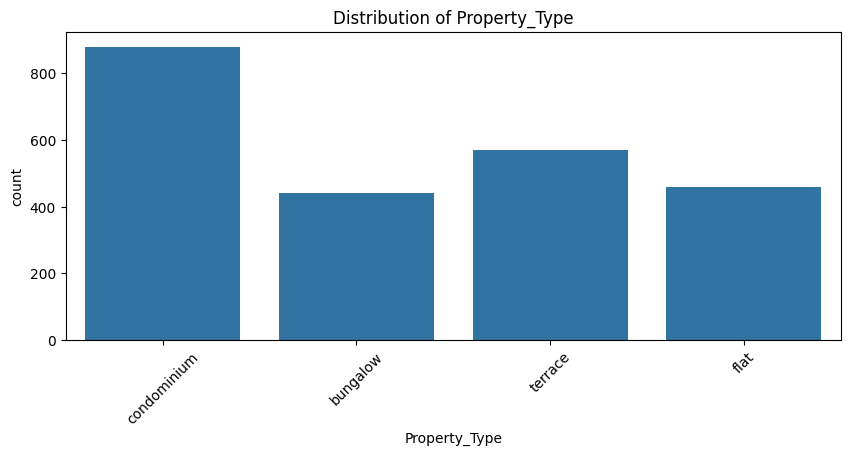

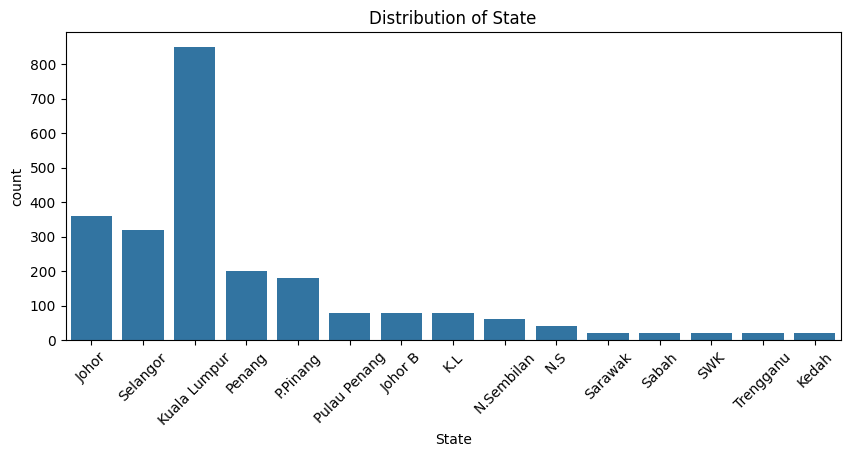

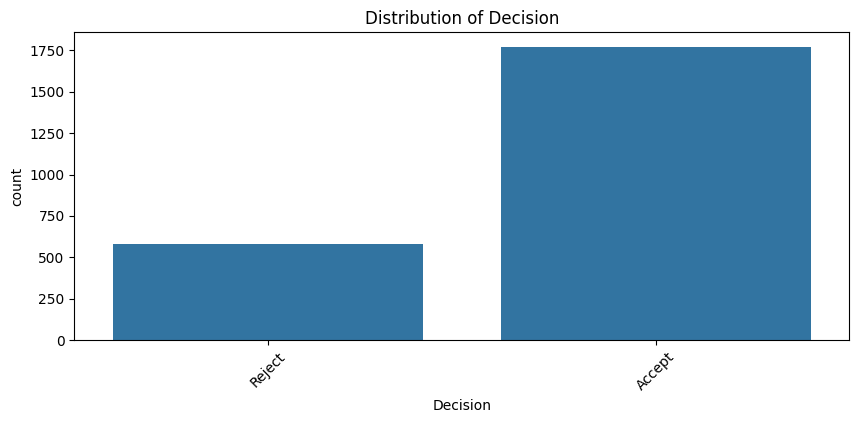

In [ ]:
# Plot distribution of categorical features
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {column}')
    plt.show()

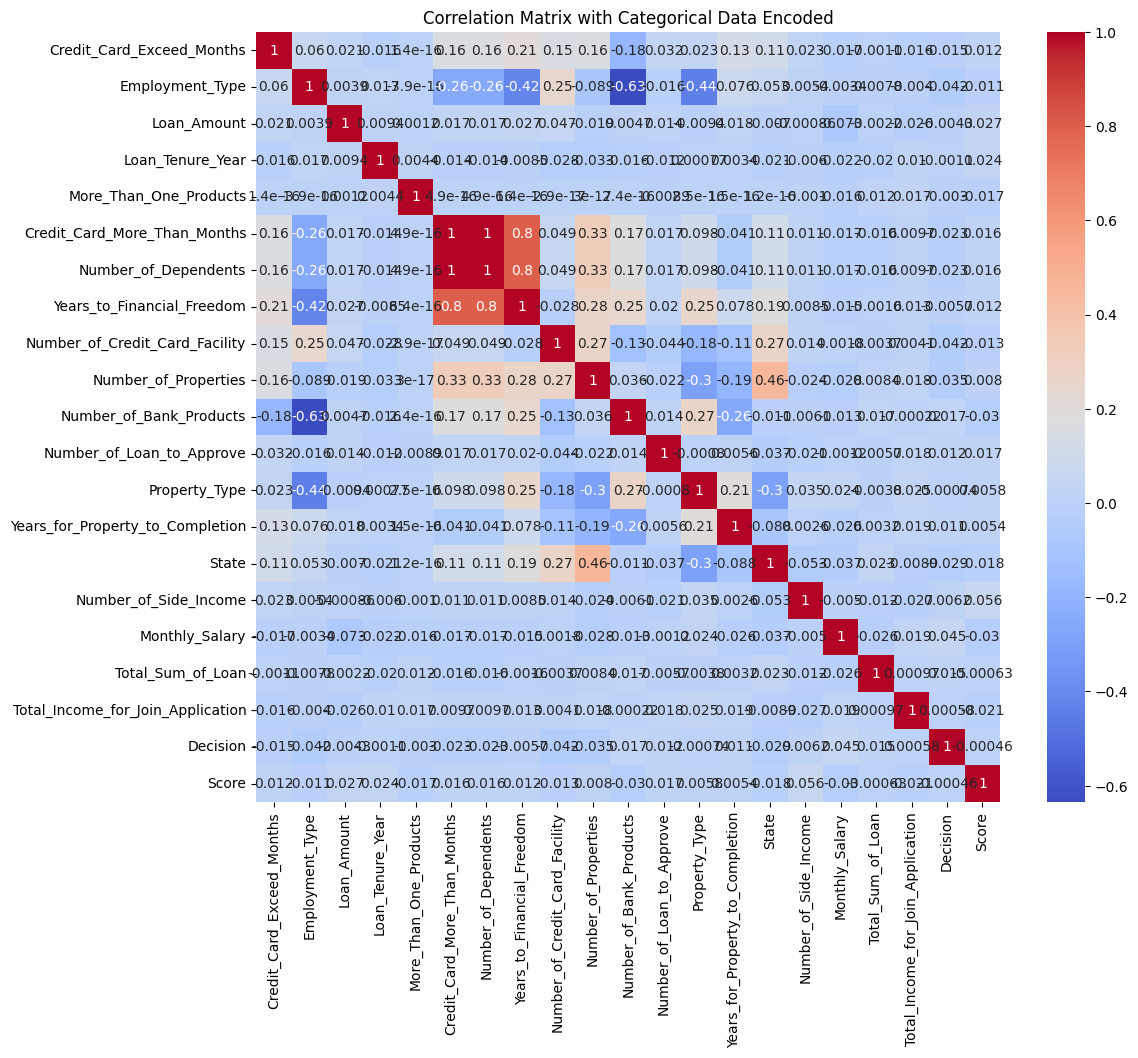

In [ ]:
# Convert categorical columns to numeric using LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Categorical Data Encoded')
plt.show()

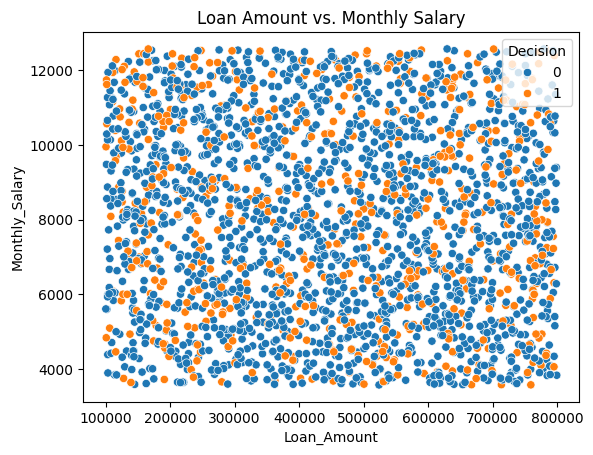

In [ ]:
# Scatter plot of two numerical variables
sns.scatterplot(data=df, x='Loan_Amount', y='Monthly_Salary', hue='Decision')
plt.title('Loan Amount vs. Monthly Salary')
plt.show()

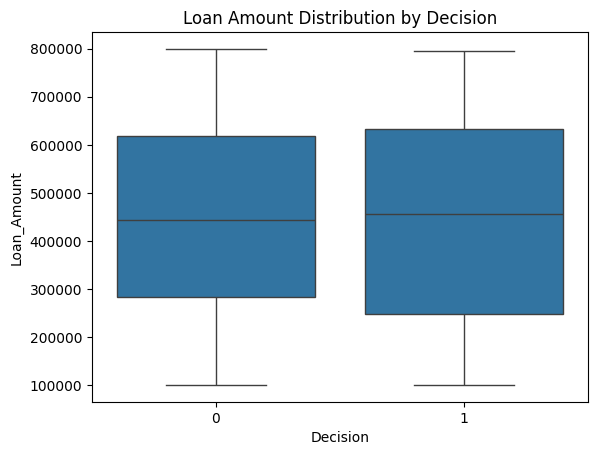

In [ ]:
# Box plot to analyze the distribution of a numerical feature based on a categorical feature
sns.boxplot(data=df, x='Decision', y='Loan_Amount')
plt.title('Loan Amount Distribution by Decision')
plt.show()

In [18]:
# Prepare X and y

X = df.drop('Decision', axis=1)
y = df['Decision']

# Dummification of variables

X = pd.get_dummies(X, drop_first=True)
X.columns

Index(['Credit_Card_Exceed_Months', 'Employment_Type', 'Loan_Amount',
       'Loan_Tenure_Year', 'More_Than_One_Products',
       'Credit_Card_More_Than_Months', 'Number_of_Dependents',
       'Years_to_Financial_Freedom', 'Number_of_Credit_Card_Facility',
       'Number_of_Properties', 'Number_of_Bank_Products',
       'Number_of_Loan_to_Approve', 'Property_Type',
       'Years_for_Property_to_Completion', 'State', 'Number_of_Side_Income',
       'Monthly_Salary', 'Total_Sum_of_Loan',
       'Total_Income_for_Join_Application', 'Score'],
      dtype='object')

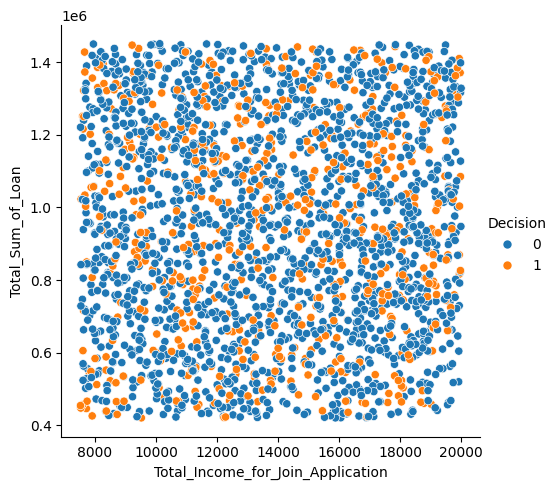

In [19]:
ax = sns.relplot(x="Total_Income_for_Join_Application", y="Total_Sum_of_Loan", hue="Decision", data=df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


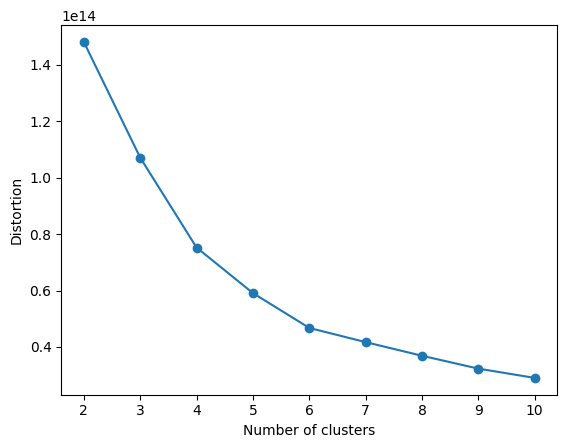

In [22]:
km = KMeans(n_clusters = 3, random_state=1)
km.fit(X)

km.labels_

distortions = []
for i in range(2,11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

<Axes: xlabel='Total_Income_for_Join_Application', ylabel='Total_Sum_of_Loan'>

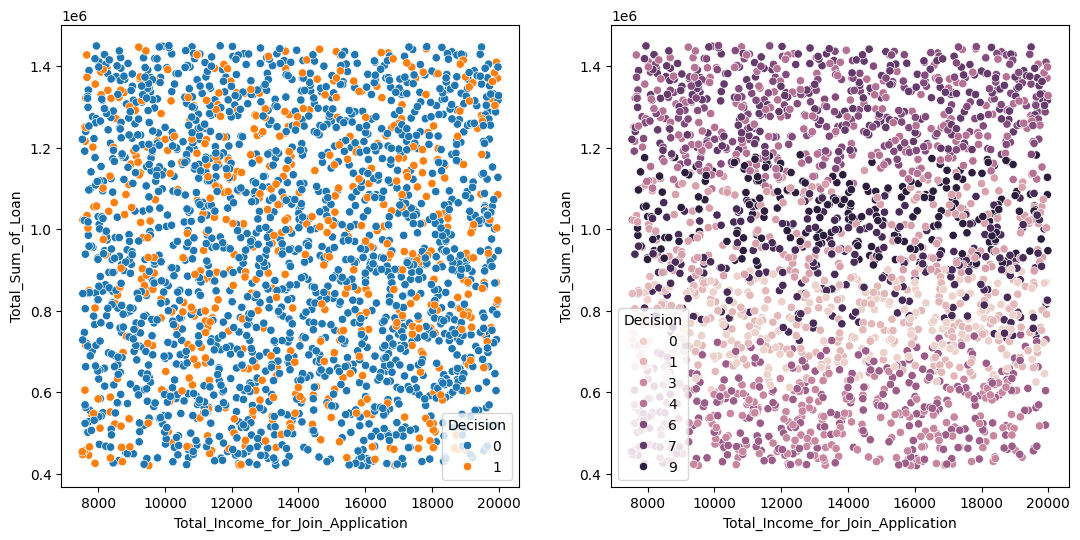

In [23]:
df_new = df.copy()
df_new = df_new.drop("Decision", axis=1)
df_new['Decision']=km.labels_

df_new.head()

fig, axes = plt.subplots(1, 2, figsize=(13,6))
fig.savefig('kMeansPlot.png')

sns.scatterplot(x="Total_Income_for_Join_Application", y="Total_Sum_of_Loan", hue="Decision", data=df, ax=axes[0])
sns.scatterplot(x="Total_Income_for_Join_Application", y="Total_Sum_of_Loan", hue="Decision", data=df_new, ax=axes[1])

Model selection training

In [ ]:
# Prepare the dataset
X = df.drop(columns=['Decision'])
y = df['Decision']

# Encode categorical features
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize classifiers
classifiers = {
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Model: GaussianNB
Accuracy: 0.7602836879432624
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       536
           1       0.00      0.00      0.00       169

    accuracy                           0.76       705
   macro avg       0.38      0.50      0.43       705
weighted avg       0.58      0.76      0.66       705

Confusion Matrix:
 [[536   0]
 [169   0]]


Model: DecisionTree
Accuracy: 0.6411347517730497
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76       536
           1       0.26      0.28      0.27       169

    accuracy                           0.64       705
   macro avg       0.52      0.52      0.52       705
weighted avg       0.65      0.64      0.64       705

Confusion Matrix:
 [[405 131]
 [122  47]]


Model: RandomForest
Accuracy: 0.7588652482269503
Classification Report:
               precision    recall  f1-sco

Visualize the confusion matrices

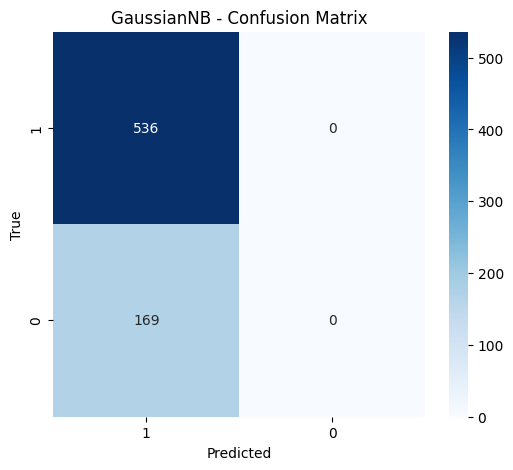

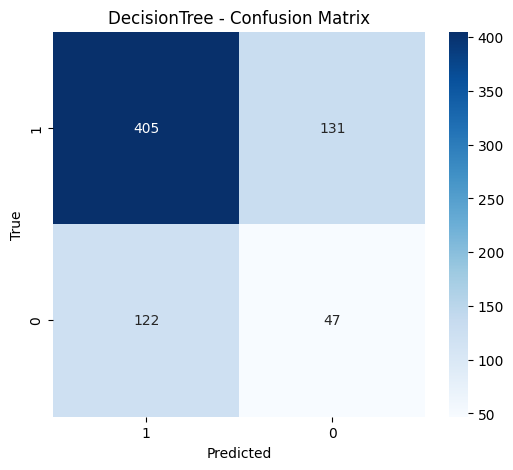

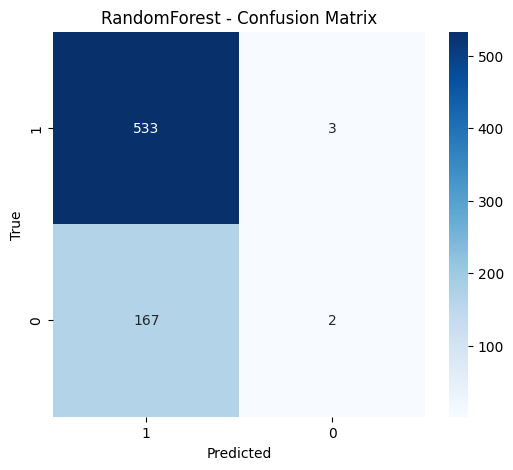

In [ ]:
for name, result in results.items():
    cm = result['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Decision'].unique(), yticklabels=df['Decision'].unique())
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Compare the accuracy of different models

          Model  Accuracy
0    GaussianNB  0.760284
1  DecisionTree  0.641135
2  RandomForest  0.758865


<ipython-input-16-53947bec3ea6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_comparison, x='Model', y='Accuracy', palette='viridis')


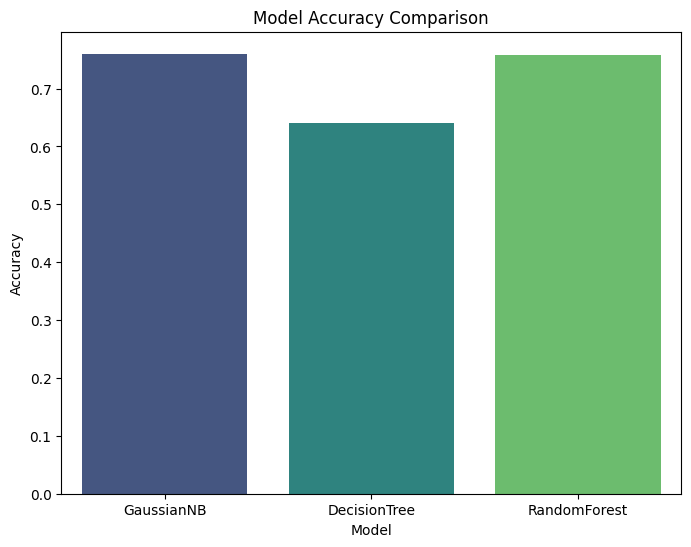

In [ ]:
# Create a DataFrame for comparison
accuracy_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [result['Accuracy'] for result in results.values()]
})
print(accuracy_comparison)

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=accuracy_comparison, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.show()

Impact of parameter changes for RandomForestClassifier

In [ ]:
# Example of tuning RandomForest parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.7495457345582989
